<a href="https://colab.research.google.com/github/sonjoy2074/Offensive_Language_Classification-/blob/main/model1_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load training data
train_df = pd.read_csv('/content/drive/MyDrive/SMTECH_DATASET/train.csv')

# Load validation data
validation_df = pd.read_csv('/content/drive/MyDrive/SMTECH_DATASET/validation.csv')

# Load test data
test_df = pd.read_csv('/content/drive/MyDrive/SMTECH_DATASET/test.csv')

# Load test labels (for evaluation)
test_labels_df = pd.read_csv('/content/drive/MyDrive/SMTECH_DATASET/test_labels.csv')

In [ ]:
# Display basic information about the training dataset
print(train_df.info())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23473 entries, 0 to 23472
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             23473 non-null  object
 1   feedback_text  23473 non-null  object
 2   toxic          23473 non-null  int64 
 3   abusive        23473 non-null  int64 
 4   vulgar         23473 non-null  int64 
 5   menace         23473 non-null  int64 
 6   offense        23473 non-null  int64 
 7   bigotry        23473 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB
None
                 id                                      feedback_text  toxic  \
0  281d77b7bebc2201  :::Sounds good.  Let me know when you're done ...      0   
1  716aac7bf3c63db1  "\nI say something, but it didn't actually con...      0   
2  57cb318c6edcf10c  "Agustina Barrientos]] \n | Modelo de Piñeiro ...      0   
3  dc3bd70118d91b3a  FYI I enjoy licking strangers scrotal sacks......      1   
4 

In [ ]:
# Check for missing values
print(train_df.isnull().sum())

id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
dtype: int64


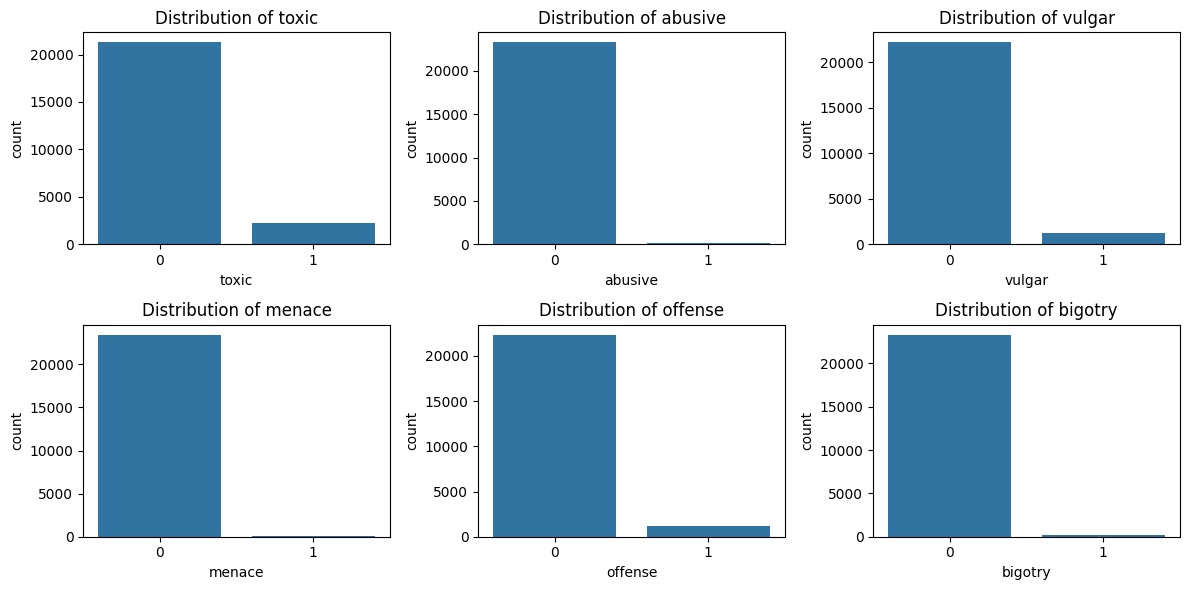

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot label distribution
labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']
plt.figure(figsize=(12, 6))
for i, label in enumerate(labels):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=train_df, x=label)
    plt.title(f'Distribution of {label}')
plt.tight_layout()
plt.show()

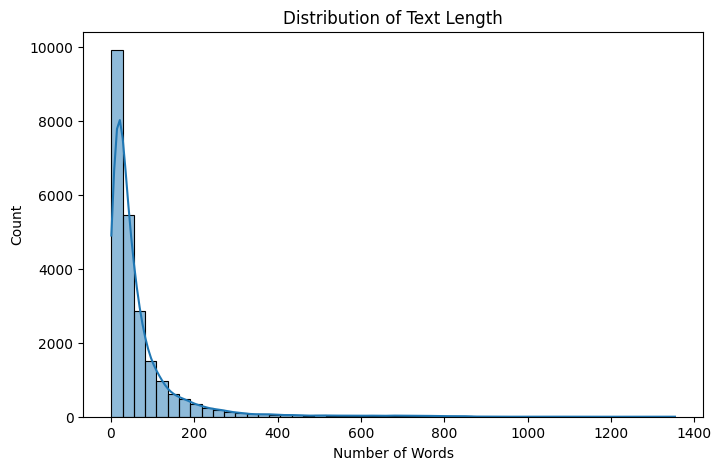

In [ ]:
# Add a column for text length
train_df['text_length'] = train_df['feedback_text'].apply(lambda x: len(x.split()))

# Plot text length distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


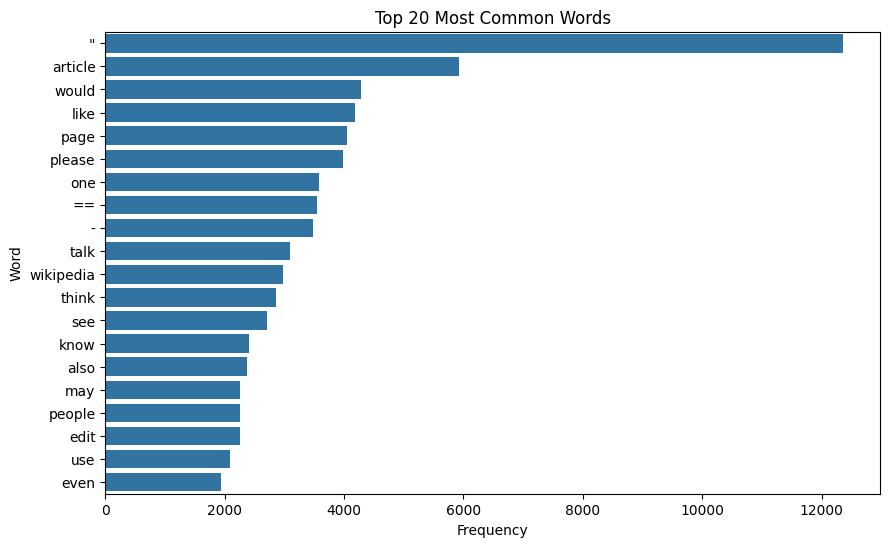

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Extract all words from feedback texts
all_words = ' '.join(train_df['feedback_text']).split()
filtered_words = [word.lower() for word in all_words if word.lower() not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Plot top N most common words
top_n = 20
most_common_words = word_counts.most_common(top_n)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title(f'Top {top_n} Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [ ]:
import nltk
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')
nltk.download('punkt')         # For tokenization
nltk.download('wordnet')       # For lemmatization
nltk.download('omw-1.4')       # WordNet data
nltk.download('stopwords')     # For stopword removal

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Preprocessing functions
def tokenize(text):
    return word_tokenize(text)

def lowercase(text):
    return text.lower()

def remove_stopwords_and_punctuation(text):
    tokens = tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]
    tokens = [word for word in tokens if word not in string.punctuation]
    return ' '.join(tokens)

def lemmatize(text):
    tokens = tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_text(text):
    text = lowercase(text)
    text = remove_stopwords_and_punctuation(text)
    text = lemmatize(text)
    return text

In [ ]:
print(train_df.columns)

Index(['id', 'feedback_text', 'toxic', 'abusive', 'vulgar', 'menace',
       'offense', 'bigotry', 'text_length'],
      dtype='object')


In [ ]:
# Apply preprocessing
train_df['cleaned_text'] = train_df['feedback_text'].apply(preprocess_text)

In [ ]:
print(train_df.shape)

(23473, 10)


In [ ]:
from sklearn.model_selection import train_test_split

X = train_df['cleaned_text']
y = train_df[['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']]

X_train_text, X_val_text, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_val_tfidf = vectorizer.transform(X_val_text)

# Train Logistic Regression
lr_model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
lr_model.fit(X_train_tfidf, y_train)




OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [ ]:
# Predict and evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_val_pred_lr = lr_model.predict(X_val_tfidf)

print("====== Logistic Regression Evaluation ======")
for i, label in enumerate(y.columns):
    print(f"\n{label.upper()}")
    print("Accuracy :", accuracy_score(y_val[label], y_val_pred_lr[:, i]))
    print("Precision:", precision_score(y_val[label], y_val_pred_lr[:, i], zero_division=0))
    print("Recall   :", recall_score(y_val[label], y_val_pred_lr[:, i], zero_division=0))
    print("F1 Score :", f1_score(y_val[label], y_val_pred_lr[:, i], zero_division=0))

====== Logistic Regression Evaluation ======

TOXIC
Accuracy : 0.9441959531416401
Precision: 0.9004739336492891
Recall   : 0.4408352668213457
F1 Score : 0.5919003115264797

ABUSIVE
Accuracy : 0.9929712460063898
Precision: 0.4444444444444444
Recall   : 0.125
F1 Score : 0.1951219512195122

VULGAR
Accuracy : 0.9684771033013845
Precision: 0.8976377952755905
Recall   : 0.4578313253012048
F1 Score : 0.6063829787234043

MENACE
Accuracy : 0.9957401490947817
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0

OFFENSE
Accuracy : 0.967199148029819
Precision: 0.9222222222222223
Recall   : 0.36086956521739133
F1 Score : 0.51875

BIGOTRY
Accuracy : 0.9919062832800852
Precision: 0.5
Recall   : 0.05263157894736842
F1 Score : 0.09523809523809523


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Tokenize
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_val_seq = tokenizer.texts_to_sequences(X_val_text)

X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=100, padding='post', truncating='post')

# Build model
model_lstm = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32),
    Dropout(0.5),
    Dense(6, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model_lstm.fit(
    X_train_pad, y_train,
    epochs=5, 
    batch_size=32,
    validation_data=(X_val_pad, y_val),
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 86s 137ms/step - accuracy: 0.3242 - loss: 0.2225 - val_accuracy: 0.9945 - val_loss: 0.1380
Epoch 2/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 78s 131ms/step - accuracy: 0.7308 - loss: 0.1498 - val_accuracy: 0.9942 - val_loss: 0.1381
Epoch 3/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - accuracy: 0.8651 - loss: 0.1368 - val_accuracy: 0.9934 - val_loss: 0.1148
Epoch 4/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.9473 - loss: 0.1014 - val_accuracy: 0.9947 - val_loss: 0.0763
Epoch 5/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.9726 - loss: 0.0739 - val_accuracy: 0.9947 - val_loss: 0.0707


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Predict
y_val_pred_lstm = model_lstm.predict(X_val_pad)
y_val_pred_lstm_binary = (y_val_pred_lstm > 0.5).astype(int)

print("====== LSTM Evaluation ======")
for i, label in enumerate(y.columns):
    print(f"\n{label.upper()}")
    print("Accuracy :", accuracy_score(y_val[label], y_val_pred_lstm_binary[:, i]))
    print("Precision:", precision_score(y_val[label], y_val_pred_lstm_binary[:, i], zero_division=0))
    print("Recall   :", recall_score(y_val[label], y_val_pred_lstm_binary[:, i], zero_division=0))
    print("F1 Score :", f1_score(y_val[label], y_val_pred_lstm_binary[:, i], zero_division=0))


147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step
====== LSTM Evaluation ======

TOXIC
Accuracy : 0.9456869009584664
Precision: 0.7514285714285714
Recall   : 0.6102088167053364
F1 Score : 0.6734955185659411

ABUSIVE
Accuracy : 0.9931842385516507
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0

VULGAR
Accuracy : 0.9663471778487753
Precision: 0.6552901023890785
Recall   : 0.7710843373493976
F1 Score : 0.7084870848708487

MENACE
Accuracy : 0.9957401490947817
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0

OFFENSE
Accuracy : 0.9635782747603834
Precision: 0.6027874564459931
Recall   : 0.7521739130434782
F1 Score : 0.6692456479690522

BIGOTRY
Accuracy : 0.9919062832800852
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
def plot_conf_matrix(y_true, y_pred, labels, model_name):
    for i, label in enumerate(labels):
        cm = confusion_matrix(y_true[label], y_pred[:, i])
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'{model_name} - Confusion Matrix: {label}')
        plt.tight_layout()
        plt.show()

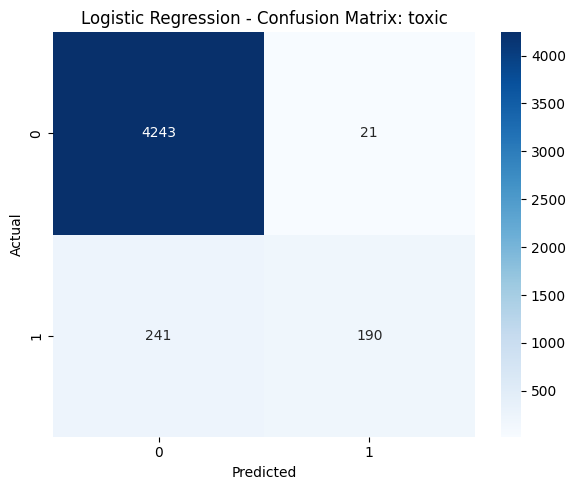

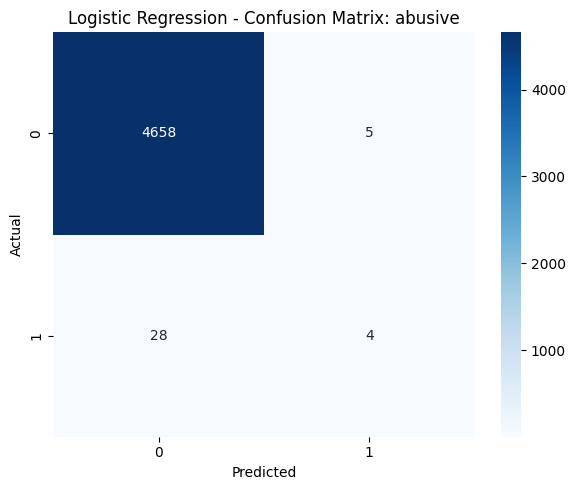

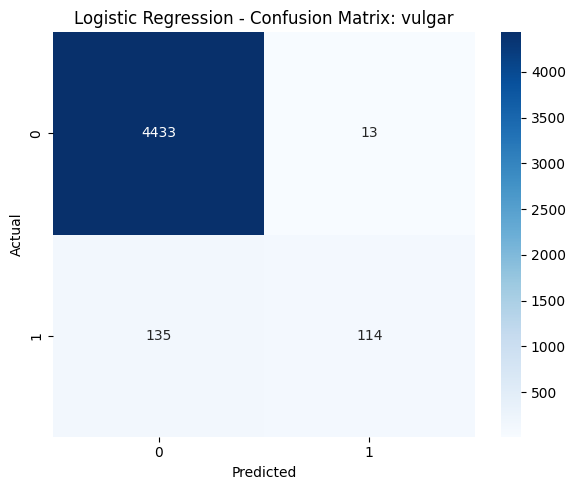

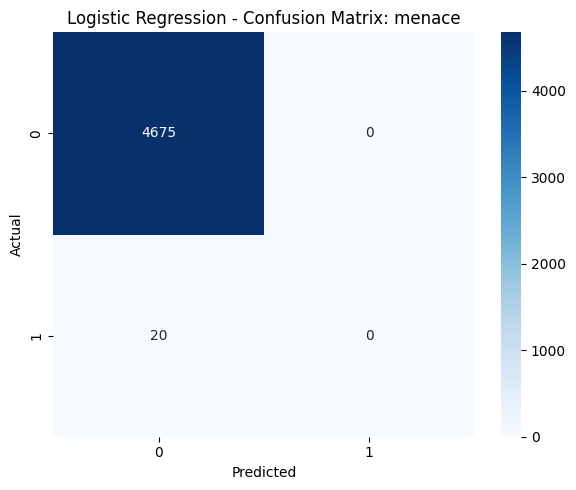

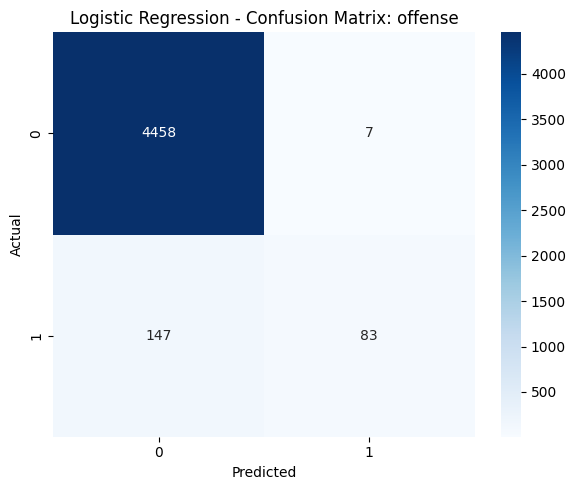

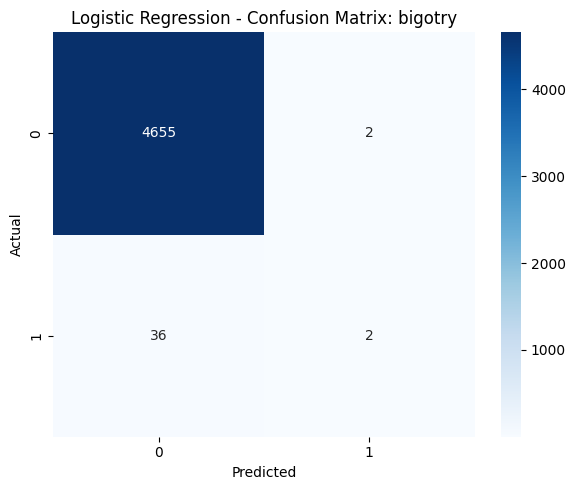

In [ ]:
plot_conf_matrix(y_val, y_val_pred_lr, y.columns, "Logistic Regression")

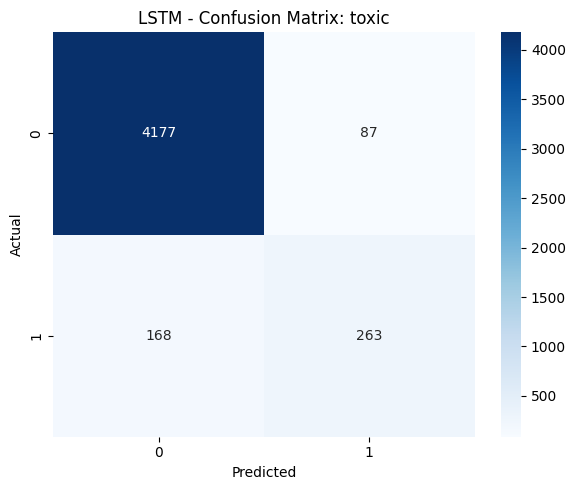

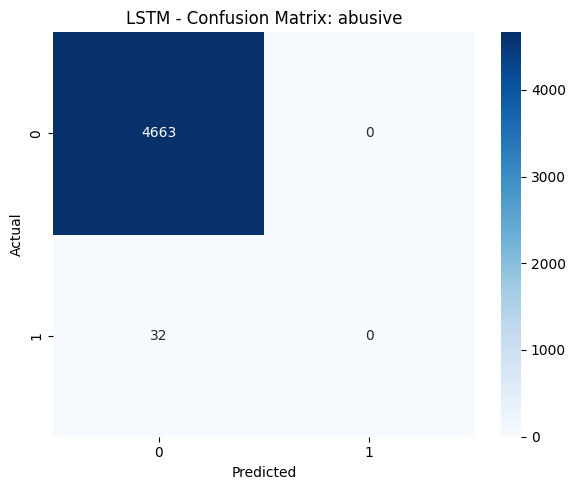

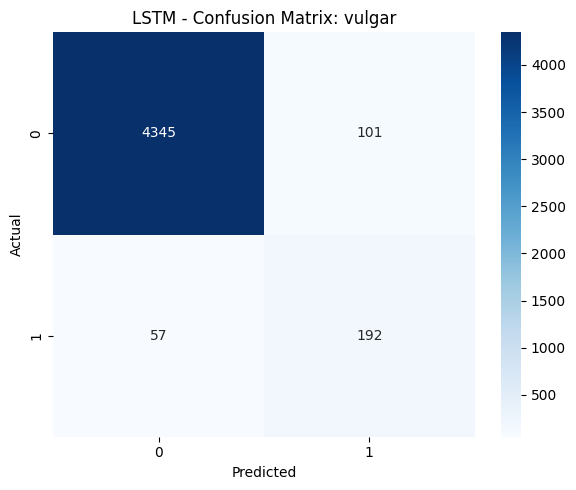

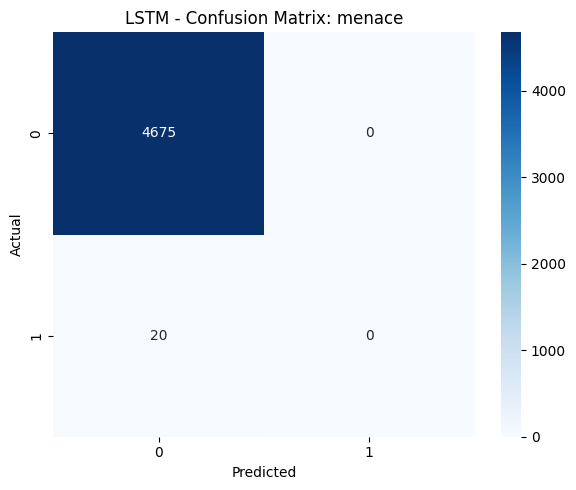

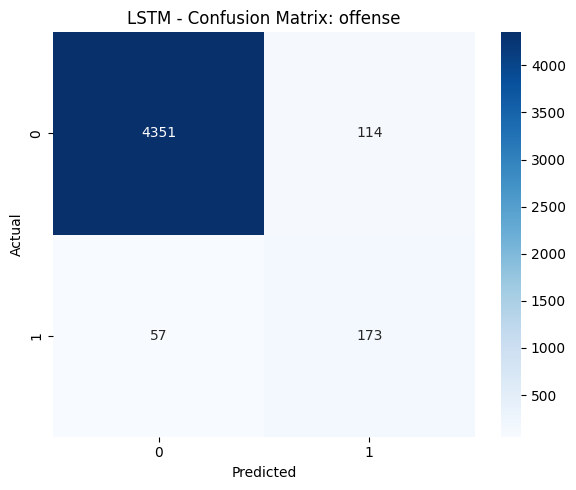

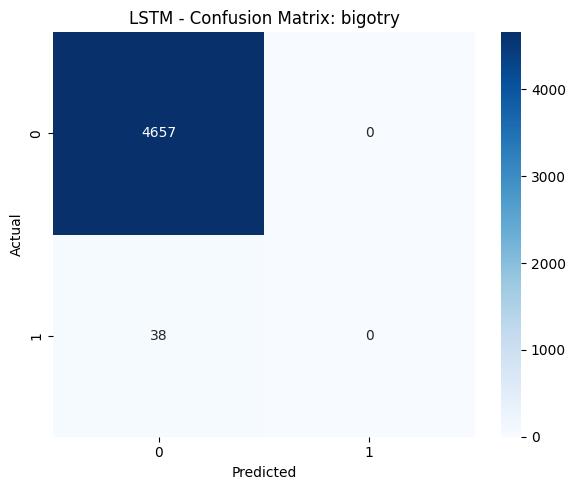

In [ ]:
plot_conf_matrix(y_val, y_val_pred_lstm_binary, y.columns, "LSTM")
